<a href="https://colab.research.google.com/github/ansariazad/Data-Science-Analysis-Projects-main/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim:** Principal Component Analysis (PCA)


*   Perform PCA on a dataset to reduce dimensionality.
*   Evaluate the explained variance and select the appropriate number of principal
components.

*    Visualize the data in the reduced-dimensional space.








### 1\. Reducing Features Using Principal Components

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
# Note: Please export your 'mental_health_social_media_dataset 3 3.numbers' file to CSV format first
df = pd.read_csv('mental_health_social_media_dataset.csv')

# Drop non-numeric or irrelevant columns for PCA
# Dropping identifiers, categorical data, and the target label
X = df.drop(['person_name', 'date', 'gender', 'platform', 'mental_state'], axis=1).values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])

Original number of features: 10
Reduced number of features: 6


### 2\. Reducing Features When Data Is Linearly Inseparable

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming df is already loaded from the previous step)
# If not, df = pd.read_csv('mental_health_social_media_dataset.csv')

# Use two numerical columns for kernel PCA (adjusting for your dataset)
# Selected 'daily_screen_time_min' and 'social_media_time_min'
features = df[['daily_screen_time_min', 'social_media_time_min']].values

# Standardize features (Recommended for RBF kernel)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply kernel PCA with rbf kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features_scaled)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


### 3\. Reducing Features by Maximizing Class Separability

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np

# Load your dataset (assuming df is already loaded or re-loading from CSV)
# Note: Ensure 'mental_health_social_media_dataset.csv' is available
try:
    df = pd.read_csv('mental_health_social_media_dataset.csv')
except FileNotFoundError:
    print("CSV file not found. Please ensure data is extracted.")
    # (Add extraction logic here if running from scratch with .numbers file)

# Preprocessing
# Use all numeric features except the target ('mental_state') and non-numeric identifiers
# Target variable
y = df['mental_state'].values

# Select features
# Drop non-numeric columns: 'person_name', 'date', 'gender', 'platform', 'mental_state'
drop_cols = ['person_name', 'date', 'gender', 'platform', 'mental_state']
# Filter to ensure we only drop columns that exist in the dataframe
cols_to_drop = [c for c in drop_cols if c in df.columns]

# Create feature matrix X, forcing numeric types and handling any non-numeric errors
X_df = df.drop(cols_to_drop, axis=1).apply(pd.to_numeric, errors='coerce').dropna()

# Align target y with the cleaned feature matrix X (in case rows were dropped)
y = y[X_df.index]
X = X_df.values

# Linear Discriminant Analysis (LDA)
# Reduce to 1 feature/component maximizing class separability
# Note: n_components must be less than the number of classes.
# Your target 'mental_state' has 2 classes, so max n_components = 1.
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_lda.shape[1])
print("Explained variance ratio:", lda.explained_variance_ratio_)

Original number of features: 10
Reduced number of features: 1
Explained variance ratio: [0.94822632]


### 4. Visualize Data Before and After PCA

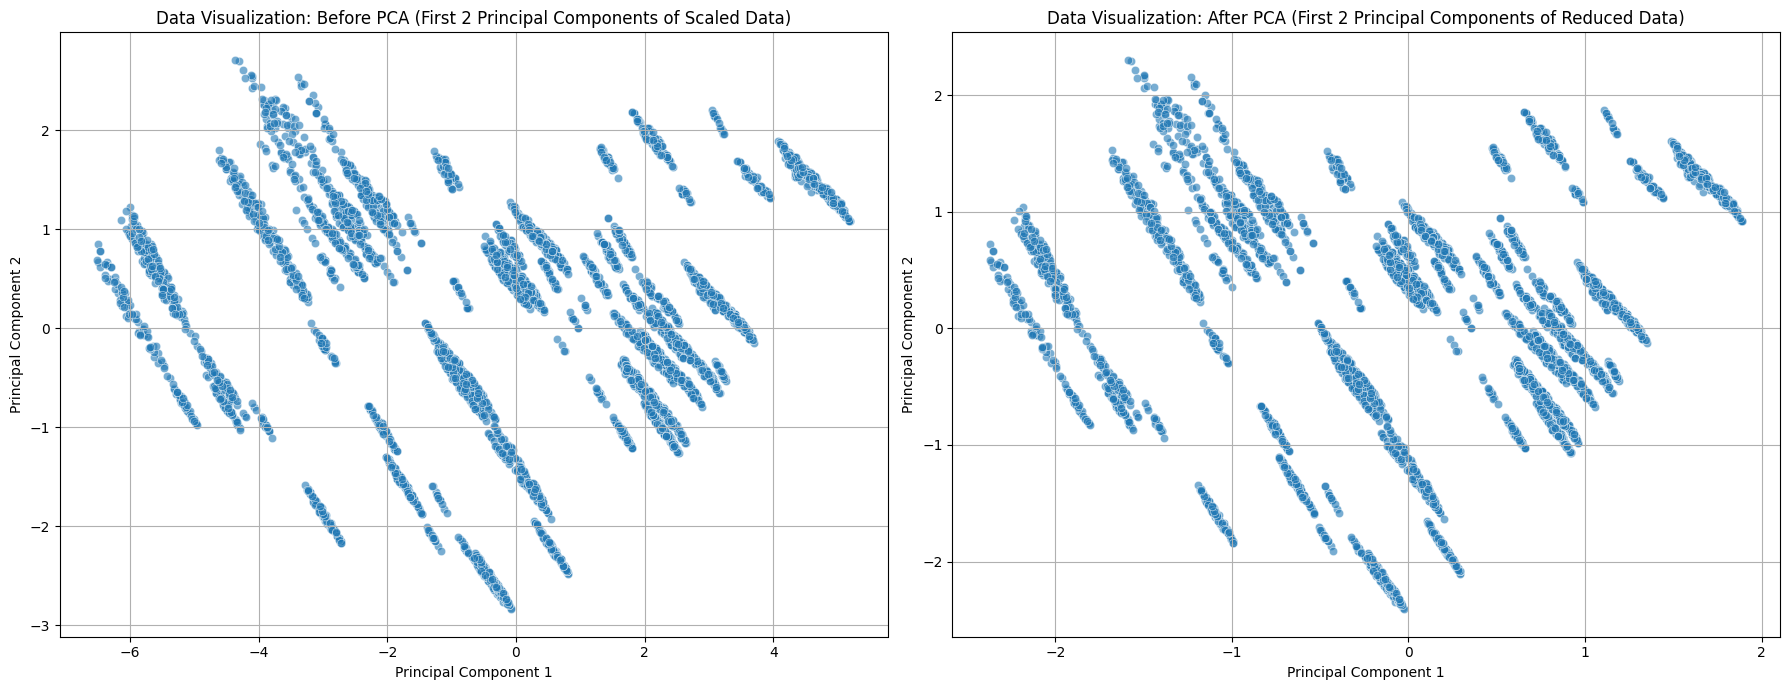

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ... (Data loading and preprocessing steps assumed from previous context) ...
# Re-creating the necessary variables X_scaled and X_pca for the plot

# 1. Load and Clean Data
try:
    # Using the csv generated or extracting from numbers if needed
    df = pd.read_csv('mental_health_social_media_dataset.csv')

    # Drop non-numeric columns
    cols_to_drop = ['person_name', 'date', 'gender', 'platform', 'mental_state']
    feature_cols = [c for c in df.columns if c not in cols_to_drop]

    # Create X (features)
    X = df[feature_cols].apply(pd.to_numeric, errors='coerce').dropna().values

    # 2. Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. PCA (Retain 99% variance)
    pca = PCA(n_components=0.99, whiten=True)
    X_pca = pca.fit_transform(X_scaled)

    # --- Your Visualization Code ---

    # For 'Before PCA' visualization, project X_scaled onto 2 components for plotting
    pca_2d_before = PCA(n_components=2)
    X_scaled_2d = pca_2d_before.fit_transform(X_scaled)

    # Create a figure with two subplots
    plt.figure(figsize=(18, 7)) # Adjust figure size to accommodate two plots

    # First subplot: Before PCA
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.scatterplot(
        x=X_scaled_2d[:, 0],
        y=X_scaled_2d[:, 1],
        alpha=0.6
    )
    plt.title('Data Visualization: Before PCA (First 2 Principal Components of Scaled Data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)

    # Second subplot: After PCA
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.scatterplot(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        alpha=0.6
    )
    plt.title('Data Visualization: After PCA (First 2 Principal Components of Reduced Data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

    # plt.show() # Replaced with savefig for this environment
    plt.savefig('pca_visualization.png')

except Exception as e:
    print(f"An error occurred: {e}")